In [267]:
import nltk
import sys
from nltk.collocations import *
import pandas as pd  
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.util import ngrams
import numpy as np
import re
from nltk.corpus import stopwords, wordnet
import time
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk.corpus  
from nltk.text import Text  
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# spacy for lemmatization
import spacy

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet
from gensim.models import Word2Vec 



from nltk.tokenize import sent_tokenize, word_tokenize
from numpy.testing import rundocs

from pprint import pprint



from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

from matplotlib import pyplot



In [122]:
import spacy 

In [527]:
df = pd.read_csv('C:/Users/Tuli/Documents/Nam_COVID19_nlp/Data/export_dataframe.csv', encoding='cp1252')

In [528]:
df.columns = ['twts']

In [529]:
df.shape

(7302, 1)

In [126]:
df.columns

Index(['twts'], dtype='object')

In [316]:
def preprocessing_initial_text_clean(p_df, p_text):

     # convert to string:
    #p_df = p_df.apply(p_df.to_string) # convert all columns of DataFrame

     # convert to string:

    p_df = p_df.astype(str)
    
    # remove punctuation

    p_df[p_text] = p_df[p_text].str.replace(r"[^\w\s]", "")

    # remove underscores not picked up as punctuation above

    p_df[p_text] = p_df[p_text].str.replace("_", " ")

    p_df[p_text] = p_df[p_text].str.replace("#", " ")
    # remove  numbers

    p_df[p_text] = p_df[p_text].str.replace(r"\d[,9][^19]", "")

    # lowercase

    p_df[p_text] = p_df[p_text].apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    
    stop = stopwords.words("english")

    p_df[p_text] = p_df[p_text].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    
    
    
    return p_df

In [539]:
df = preprocessing_initial_text_clean(df, 'twts')

In [318]:
alltext = list(df['twts'])

In [ ]:
#sentimental analysis using the textblob package 
#Using TextBlob to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment

In [544]:
from textblob import TextBlob

In [546]:
df['polarity'] = df['twts'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['twts'].astype(str).apply(len)
df['word_count'] = df['twts'].apply(lambda x: len(str(x).split()))

In [548]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity == 1, ['twts']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

national lockdown perfect opportunity crime
might best covid tracking site going covid
send best quarantine recipe preferably pescatarianfriendly
katyturnbc well celebrate years may husband doesnt need quarantine remind fondly legendary gray football career often might forget
baking delicious way manage stress try one baking recipes pass time working home httpsbufflyuoqavf


In [551]:
print('2 reviews with the most negative polarity: \n')
cl = df.loc[df.polarity == -1, ['twts']].sample(4).values
for c in cl:
    print(c[0])

2 reviews with the most negative polarity: 

breaking graham allens parents terrible job raising hes trying create conflict midst americans suffering dying rt covid
quarantine boring wish person
windhoek lager like worst beer ever brewed history beers
shocking centre covid crisis httpsyoutube jfqrgwo via youtube lord sugar douglaskmurray borisjohnson theresa may


In [593]:
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px

In [586]:
data = [go.Bar(x=df['word_count'] , y=df['review_len'])]

In [594]:
fig = px.bar(data)
fig.show()

In [598]:
fig = go.Figure([go.Bar(x=df['word_count'] , y=df['review_len'])])
fig.show()

In [600]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['twts'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['twts' , 'count'])

data = df2.groupby('twts').sum()['count'].sort_values(ascending=False)

covid 2027
coronavirus 1545
namibia 1302
home 1188
quarantine 1066
working 1029
windhoek 1016
national 1009
lockdown 976
people 551
health 520
cases 507
im 491
virus 402
social 386
day 367
like 356
amp 337
need 329
time 322


In [601]:
fig = go.Figure([go.Bar(x=df['word_count'] , y=df['review_len'])])
fig.show()

In [319]:
print (alltext[1:5])

['president botswana placed isolation trip namibia weekend mr mnangagwa zimbabwe coronavirus', 'botswana president coronavirus selfisolation namibia trip httpswwwafricanewscombotswanapresidentinselfisolationafternamibiatrip cc magufulijp', 'update botswana director health services puts countrys president mokgweetsi masisi isolation days trip namibia measure contain spread coronavirus covid', 'botswana president mokgweetsi masisi placed selfisolation days tested coronavirus afterwards following trip hage geingob inauguration namibia yesterday']


## Form Bigrams & Trigrams

In [611]:
ngram = []
tokens = []
for line in alltext:
    token = nltk.word_tokenize(line)
    tokens.extend(token)
    ngram.extend(list(ngrams(token, 2)))
counts = Counter(ngram)
print(counts.most_common())

[(('working', 'home'), 810), (('national', 'lockdown'), 574), (('social', 'services'), 237), (('ministry', 'health'), 199), (('coronavirus', 'covid'), 183), (('health', 'social'), 168), (('cases', 'coronavirus'), 165), (('corona', 'virus'), 157), (('two', 'cases'), 118), (('windhoek', 'namibia'), 112), (('first', 'two'), 107), (('covid', 'coronavirus'), 100), (('namibia', 'reports'), 92), (('covid', 'covid'), 90), (('reports', 'first'), 89), (('coronavirus', 'cases'), 85), (('south', 'africa'), 80), (('travel', 'ban'), 76), (('stay', 'home'), 75), (('tested', 'positive'), 75), (('day', 'quarantine'), 74), (('coronavirus', 'namibia'), 72), (('national', 'guard'), 71), (('social', 'distancing'), 67), (('gon', 'na'), 66), (('im', 'working'), 64), (('first', 'cases'), 63), (('casos', 'de'), 56), (('work', 'home'), 56), (('national', 'lock'), 56), (('el', 'covid'), 54), (('imposes', 'travel'), 52), (('windhoek', 'draught'), 51), (('coronavirus', 'imposes'), 50), (('need', 'national'), 47), 

In [322]:
bigrams = nltk.collocations.BigramAssocMeasures()
trigrams = nltk.collocations.TrigramAssocMeasures()
bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(tokens)
trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(tokens)

In [323]:
#bigrams
bigram_freq = bigramFinder.ngram_fd.items()
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
#trigrams
trigram_freq = trigramFinder.ngram_fd.items()
trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)

In [ ]:
print(bigramFreqTable)

In [326]:
bigramFreqTable.head(10)

bigram  freq
5783        (working, home)   810
36216  (national, lockdown)   574
311      (social, services)   237
309      (ministry, health)   199
67     (coronavirus, covid)   187
310        (health, social)   168
378    (cases, coronavirus)   165
279         (corona, virus)   157
3467           (two, cases)   118
3938    (windhoek, namibia)   114

In [327]:
print(trigramFreqTable)

                          trigram  freq
348    (health, social, services)   165
347    (ministry, health, social)   158
3884    (two, cases, coronavirus)   105
3883          (first, two, cases)   102
3881    (namibia, reports, first)    87
...                           ...   ...
34095     (globally, china, asia)     1
34094  (exposed, globally, china)     1
34093  (truth, exposed, globally)     1
34092      (vile, truth, exposed)     1
97875       (end, meetings, time)     1

[97876 rows x 2 columns]


In [328]:
trigramFreqTable.head(10)

trigram  freq
348        (health, social, services)   165
347        (ministry, health, social)   158
3884        (two, cases, coronavirus)   105
3883              (first, two, cases)   102
3881        (namibia, reports, first)    87
3882            (reports, first, two)    84
84876             (im, working, home)    53
3887           (imposes, travel, ban)    52
3886   (coronavirus, imposes, travel)    50
3885    (cases, coronavirus, imposes)    50

In [332]:
#filter for only those with more than 20 occurences
bigramFinder.apply_freq_filter(30)
trigramFinder.apply_freq_filter(30)
bigramPMITable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.pmi)), columns=['bigram','PMI']).sort_values(by='PMI', ascending=False)
trigramPMITable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.pmi)), columns=['trigram','PMI']).sort_values(by='PMI', ascending=False)

In [333]:
print(bigramPMITable)

                      bigram        PMI
0        (kalumbi, shangula)  11.424822
1               (chad, wolf)  11.148190
2            (hage, geingob)  10.783276
3          (primeros, casos)   9.820751
4          (imposes, travel)   9.647909
..                       ...        ...
63      (covid, coronavirus)   1.909696
64  (quarantine, quarantine)   1.760050
65      (windhoek, windhoek)   1.676272
66            (covid, covid)   1.490735
67           (home, working)   1.432295

[68 rows x 2 columns]


In [334]:
print(trigramPMITable)

                            trigram        PMI
0            (imposes, travel, ban)  19.886864
1             (reports, first, two)  16.869966
2    (coronavirus, imposes, travel)  15.744684
3        (health, social, services)  15.060123
4        (ministry, health, social)  15.017550
5               (first, two, cases)  14.932416
6         (namibia, reports, first)  14.545622
7     (cases, coronavirus, imposes)  13.803237
8    (fiveweek, national, lockdown)  13.584053
9      (national, lockdown, defeat)  13.124622
10        (two, cases, coronavirus)  12.656970
11  (lockdown, defeat, coronavirus)  12.509941
12         (casos, de, coronavirus)  11.963932
13      (first, cases, coronavirus)  10.592340
14       (need, national, lockdown)  10.544037
15              (im, working, home)  10.060496


In [335]:
text = nltk.Text(tokens)

In [336]:
type(text)

nltk.text.Text

In [337]:
text.collocations()

working home; national lockdown; social services; ministry health;
corona virus; health social; travel ban; reports first; first two; two
cases; south africa; tested positive; cases coronavirus; namibia
reports; social distancing; imposes travel; national guard; kalumbi
shangula; hage geingob; chad wolf


In [345]:
text.concordance("covid")

Displaying 25 of 2027 matches:
mibia critical time even though zero covid cases botswana knowing full well the
oli botswana citizen expected better covid coronavirus president botswana place
a measure contain spread coronavirus covid botswana president mokgweetsi masisi
ngola mosbunecos namibia coronavirus covid covid gathering mnangagwa attended n
mosbunecos namibia coronavirus covid covid gathering mnangagwa attended namibia
learn happened italy may god help us covid namibia bwgovernment looking confirm
n following trip namibia coronavirus covid hope botswana people dont go south a
lation days namibia trip coronavirus covid president president went self isolat
uys hiding things public coronavirus covid global cases pm tconfirmed congo bra
ist zambia claiming heal coronavirus covid nabbed namibia país já tem coronavír
omer comon guys touching coronavirus covid china namibia namibia statistics age
apping exercise response coronavirus covid state emergency declared president h
ht somewh

In [346]:
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25)

# apply transformation
tf = vectorizer.fit_transform(df['twts']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [148]:
type(tf)

numpy.ndarray

In [ ]:
#more data visualisation  - top five topics 

In [573]:
reindexed_data = df['twts']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)
    
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words
    


In [574]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

In [575]:
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  namibia coronavirus cases
Topic 2:  home working im
Topic 3:  windhoek draught namibia
Topic 4:  national lockdown need
Topic 5:  covid en la
Topic 6:  quarantine day im


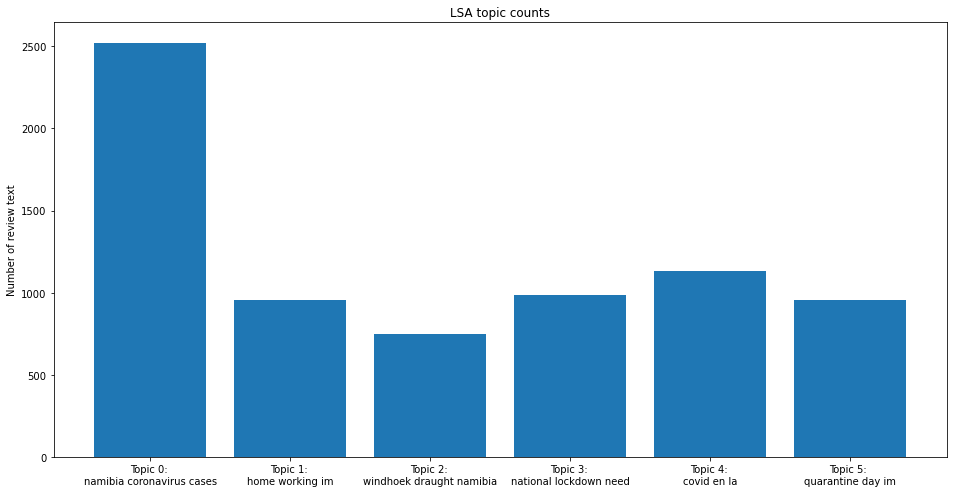

In [576]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts'); 
plt.show()

In [348]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [350]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0         covid          1344.6          home          1176.2            de   
1   coronavirus           489.9       working          1028.4            en   
2         virus           300.9            im           335.6         covid   
3        corona           215.2          work           264.6            el   
4      pandemic           180.9          stay           162.5            la   
5       namibia           148.9          time           134.2           que   
6         china           148.7          week           133.7   coronavirus   
7         world           116.5           get           113.6         casos   
8      outbreak            91.7      tomorrow           103.7            un   
9           cdc            83.4          like           103.4           por   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0           550.1      lockdown           298.7         covid           238.9   
1           311.1      national           286.6          like           210.7   
2           307.4        people           160.8        people           190.6   
3           215.1         going           103.4    quarantine           174.7   
4           213.1         weeks            82.3         would           149.1   
5           204.1            na            72.9          many            99.8   
6           147.6          last            69.2           die            84.1   
7           114.1         since            66.8          cant            80.1   
8           111.1          know            66.3          days            79.7   
9            93.1         could            65.8          dont            75.1   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights  \
0      windhoek           951.4        health           406.1   
1    quarantine           861.0        social           386.1   
2           day           287.6      services           291.1   
3           one            97.4      ministry           287.1   
4           got            84.3          lock            96.1   
5            im            84.0    distancing            73.1   
6          city            74.7     community            60.1   
7          come            67.1        police            47.7   
8          make            62.0      children            47.1   
9           get            58.0        public            44.7   

      Topic 7 words Topic 7 weights Topic 8 words Topic 8 weights  \
0          national           698.1       namibia           968.0   
1          lockdown           663.0   coronavirus           659.5   
2              need           202.3         cases           327.8   
3               amp           157.5         first           229.0   
4  nationallockdown           116.1           two           208.2   
5       coronavirus           100.8        africa           137.4   
6              time            87.1        travel           132.1   
7             needs            85.1     president           128.6   
8                us            82.9      zimbabwe           109.8   
9            spread            80.9       reports           109.1   

  Topic 9 words Topic 9 weights  
0         cases           157.1  
1      positive           155.1  
2   coronavirus           147.7  
3          test           146.7  
4        tested           118.1  
5       namibia           112.1  
6         covid            90.7  
7          said            89.3  
8        couple            87.1  
9      minister            85.0

In [151]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(model, np.matrix(tf), vectorizer, mds='tsne')
panel
 

D:\Programs\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      43.278454 -39.476688       1        1  17.929553
0     -24.091579  51.782619       2        1  10.862532
7       7.549829 -69.995773       3        1  10.534775
8      33.971573   1.871880       4        1  10.487396
4     -13.149067   9.684105       5        1  10.420373
5     -38.516041 -60.728153       6        1   9.698056
3     -59.816883  21.265667       7        1   8.907196
2      21.974476  42.520702       8        1   8.055733
9      -3.385005 -27.894823       9        1   6.950892
6     -50.502716 -20.079769      10        1   6.153495, topic_info=    Category         Freq        Term        Total  loglift  logprob
111  Default  1999.000000       covid  1999.000000  30.0000  30.0000
605  Default   950.000000    windhoek   950.000000  29.0000  29.0000
241  Default  1118.000000        home  1118.000000  28.0000  28.0000
360  Default  1301.000000     namibia  1301.000000  27.0000  27.0000
431  Default  1007.000000  quarantine  1007.000000  26.0000  26.0000
..       ...          ...         ...          ...      ...      ...
598  Topic10    20.148687        well   128.335382   0.9366  -5.1181
595  Topic10    23.328589        week   210.097350   0.5903  -4.9716
216  Topic10    19.759397  government   136.577800   0.8549  -5.1376
405  Topic10    25.104588      people   557.185179  -0.3117  -4.8982
579  Topic10    20.053794          us   313.755409   0.0380  -5.1228

[487 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3         3  0.908248       act
3        10  0.062638       act
4         7  0.969385    acting
5         3  0.776218    action
5         4  0.172493    action
...     ...       ...       ...
627       5  0.010724     youre
627       6  0.064342     youre
627       7  0.128684     youre
629       8  0.973465    zambia
630       4  0.987963  zimbabwe

[1113 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 8, 9, 5, 6, 4, 3, 10, 7])

In [152]:
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      43.278454 -39.476688       1        1  17.929553
0     -24.091579  51.782619       2        1  10.862532
7       7.549829 -69.995773       3        1  10.534775
8      33.971573   1.871880       4        1  10.487396
4     -13.149067   9.684105       5        1  10.420373
5     -38.516041 -60.728153       6        1   9.698056
3     -59.816883  21.265667       7        1   8.907196
2      21.974476  42.520702       8        1   8.055733
9      -3.385005 -27.894823       9        1   6.950892
6     -50.502716 -20.079769      10        1   6.153495, topic_info=    Category         Freq        Term        Total  loglift  logprob
111  Default  1999.000000       covid  1999.000000  30.0000  30.0000
605  Default   950.000000    windhoek   950.000000  29.0000  29.0000
241  Default  1118.000000        home  1118.000000  28.0000  28.0000
360  Default  1301.000000     namibia  1301.000000  27.0000  27.0000
431  Default  1007.000000  quarantine  1007.000000  26.0000  26.0000
..       ...          ...         ...          ...      ...      ...
598  Topic10    20.148687        well   128.335382   0.9366  -5.1181
595  Topic10    23.328589        week   210.097350   0.5903  -4.9716
216  Topic10    19.759397  government   136.577800   0.8549  -5.1376
405  Topic10    25.104588      people   557.185179  -0.3117  -4.8982
579  Topic10    20.053794          us   313.755409   0.0380  -5.1228

[487 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3         3  0.908248       act
3        10  0.062638       act
4         7  0.969385    acting
5         3  0.776218    action
5         4  0.172493    action
...     ...       ...       ...
627       5  0.010724     youre
627       6  0.064342     youre
627       7  0.128684     youre
629       8  0.973465    zambia
630       4  0.987963  zimbabwe

[1113 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 8, 9, 5, 6, 4, 3, 10, 7])

In [ ]:
#LDA model topic visualiation

In [536]:

all_topics = {}
lambd = 0.5  # Adjust this accordingly
for i in range(1,10): #Adjust this to reflect number of topics chosen for final LDA model
    topic = panel.topic_info[panel.topic_info.Category == 'Topic'+str(i)]
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:10].values

D:\Programs\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [538]:
pd.DataFrame(all_topics).T

0            1       2                 3            4  \
Topic 1      home      working    work                im         stay   
Topic 2     covid        virus  corona          pandemic  coronavirus   
Topic 3  national     lockdown    need  nationallockdown        needs   
Topic 4   namibia  coronavirus   cases               two        first   
Topic 5      like        would     die              many       people   
Topic 6  windhoek   quarantine     day              city      draught   
Topic 7  lockdown     national   weeks                na       people   
Topic 8        de           en      el                la          que   
Topic 9  positive         test  tested            couple     minister   

                5         6                    7       8          9  
Topic 1  tomorrow    office               trying    week    friends  
Topic 2     china  outbreak  coronaviruspandemic     cdc      world  
Topic 3       amp    states              america    stop      mohss  
Topic 4    travel  zimbabwe              reports  africa  president  
Topic 5     every     thing                  say    cant        god  
Topic 6       got      yall            available   north       shit  
Topic 7       lot   current                video  acting      april  
Topic 8     casos        un                  por    para        los  
Topic 9    deaths      said                spain   tests      cases

In [571]:
display_topics(model, tf_feature_names, no_top_words)

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0         covid          1344.6          home          1176.2            de   
1   coronavirus           489.9       working          1028.4            en   
2         virus           300.9            im           335.6         covid   
3        corona           215.2          work           264.6            el   
4      pandemic           180.9          stay           162.5            la   
5       namibia           148.9          time           134.2           que   
6         china           148.7          week           133.7   coronavirus   
7         world           116.5           get           113.6         casos   
8      outbreak            91.7      tomorrow           103.7            un   
9           cdc            83.4          like           103.4           por   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0           550.1      lockdown           298.7         covid           238.9   
1           311.1      national           286.6          like           210.7   
2           307.4        people           160.8        people           190.6   
3           215.1         going           103.4    quarantine           174.7   
4           213.1         weeks            82.3         would           149.1   
5           204.1            na            72.9          many            99.8   
6           147.6          last            69.2           die            84.1   
7           114.1         since            66.8          cant            80.1   
8           111.1          know            66.3          days            79.7   
9            93.1         could            65.8          dont            75.1   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights  \
0      windhoek           951.4        health           406.1   
1    quarantine           861.0        social           386.1   
2           day           287.6      services           291.1   
3           one            97.4      ministry           287.1   
4           got            84.3          lock            96.1   
5            im            84.0    distancing            73.1   
6          city            74.7     community            60.1   
7          come            67.1        police            47.7   
8          make            62.0      children            47.1   
9           get            58.0        public            44.7   

      Topic 7 words Topic 7 weights Topic 8 words Topic 8 weights  \
0          national           698.1       namibia           968.0   
1          lockdown           663.0   coronavirus           659.5   
2              need           202.3         cases           327.8   
3               amp           157.5         first           229.0   
4  nationallockdown           116.1           two           208.2   
5       coronavirus           100.8        africa           137.4   
6              time            87.1        travel           132.1   
7             needs            85.1     president           128.6   
8                us            82.9      zimbabwe           109.8   
9            spread            80.9       reports           109.1   

  Topic 9 words Topic 9 weights  
0         cases           157.1  
1      positive           155.1  
2   coronavirus           147.7  
3          test           146.7  
4        tested           118.1  
5       namibia           112.1  
6         covid            90.7  
7          said            89.3  
8        couple            87.1  
9      minister            85.0

In [153]:
import pandas as pd
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()

Loading BokehJS ...

In [160]:
output_notebook()

Loading BokehJS ...

In [161]:
df.shape

(7302, 1)

In [162]:
#Let’s plot documents in 2D:

In [612]:
svd = TruncatedSVD(n_components=2)
documents_2d = svd.fit_transform(tf)
 
df1 = pd.DataFrame(columns=['x', 'y', 'document'])
df1['x'], df1['y'], df1['document'] = documents_2d[:,0], documents_2d[:,1], range(len(df['twts']))
 
source = ColumnDataSource(ColumnDataSource.from_df(df1))
labels = LabelSet(x="x", y="y", text="document", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

In [164]:
#To display words in 2D we just need to transpose the vectorized data: words_2d = svd.fit_transform(data_vectorized.T).

In [165]:
svd = TruncatedSVD(n_components=2)
words_2d = svd.fit_transform(tf.T)
 
df1 = pd.DataFrame(columns=['x', 'y', 'word'])
df1['x'], df1['y'], df1['word'] = words_2d[:,0], words_2d[:,1], vectorizer.get_feature_names()
 
source = ColumnDataSource(ColumnDataSource.from_df(df1))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=20, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)
 

In [166]:
#use gensim

In [351]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(alltext))

print(data_words[:1])

[['someone', 'actually', 'admires', 'masisihis', 'judgement', 'travel', 'non', 'essentially', 'namibia', 'critical', 'time', 'even', 'though', 'zero', 'covid', 'cases', 'botswana', 'knowing', 'full', 'well', 'theres', 'uneasiness', 'amp', 'border', 'controli', 'botswana', 'citizen', 'expected', 'better', 'covid', 'coronavirus']]


In [352]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['someone', 'actually', 'admires', 'masisihis', 'judgement', 'travel', 'non', 'essentially', 'namibia', 'critical', 'time', 'even_though', 'zero', 'covid', 'cases', 'botswana', 'knowing', 'full', 'well', 'theres', 'uneasiness', 'amp', 'border', 'controli', 'botswana', 'citizen', 'expected', 'better', 'covid', 'coronavirus']


In [364]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [365]:
import en_core_web_sm
#check the way Scap was installed on the system = it is not detecting the packages very well 

In [363]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#python3 -m spacy download en_core_web_sm
#nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


# Do lemmatization keeping only noun, adj, vb, adv
nlp = en_core_web_sm.load()
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['actually', 'admire', 'judgement', 'travel', 'non', 'essentially', 'critical', 'time', 'covid', 'case', 'botswana', 'know', 'full', 'well', 'there', 's', 'uneasiness', 'amp', 'border', 'expect', 'well']]


In [370]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2)]]


In [371]:
id2word[1]

'admire'

In [372]:
a=[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [373]:
print (a)

[[('actually', 1), ('admire', 1), ('amp', 1), ('border', 1), ('botswana', 1), ('case', 1), ('covid', 1), ('critical', 1), ('essentially', 1), ('expect', 1), ('full', 1), ('judgement', 1), ('know', 1), ('non', 1), ('s', 1), ('there', 1), ('time', 1), ('travel', 1), ('uneasiness', 1), ('well', 2)]]


In [374]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=50, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [375]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(39,
  '0.000*"hearte" + 0.000*"natis" + 0.000*"olye" + 0.000*"sobiso" + '
  '0.000*"versa" + 0.000*"vice" + 0.000*"ideaperhap" + 0.000*"competitor" + '
  '0.000*"erfordern" + 0.000*"sitzt"'),
 (46,
  '0.000*"hearte" + 0.000*"natis" + 0.000*"olye" + 0.000*"sobiso" + '
  '0.000*"versa" + 0.000*"vice" + 0.000*"ideaperhap" + 0.000*"competitor" + '
  '0.000*"erfordern" + 0.000*"sitzt"'),
 (23,
  '0.000*"hearte" + 0.000*"natis" + 0.000*"olye" + 0.000*"sobiso" + '
  '0.000*"versa" + 0.000*"vice" + 0.000*"ideaperhap" + 0.000*"competitor" + '
  '0.000*"erfordern" + 0.000*"sitzt"'),
 (13,
  '0.000*"hearte" + 0.000*"natis" + 0.000*"olye" + 0.000*"sobiso" + '
  '0.000*"versa" + 0.000*"vice" + 0.000*"ideaperhap" + 0.000*"competitor" + '
  '0.000*"erfordern" + 0.000*"sitzt"'),
 (32,
  '0.000*"hearte" + 0.000*"natis" + 0.000*"olye" + 0.000*"sobiso" + '
  '0.000*"versa" + 0.000*"vice" + 0.000*"ideaperhap" + 0.000*"competitor" + '
  '0.000*"erfordern" + 0.000*"sitzt"'),
 (37,
  '0.000*"hearte" + 0.00

In [214]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -39.7436289078619

Coherence Score:  0.5020669498159067


In [215]:
# Visualize the topics
import pyLDAvis.gensim

In [609]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

D:\Programs\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




TypeError: Object of type complex is not JSON serializable

PreparedData(topic_coordinates=                        x                   y  topics  cluster      Freq
topic                                                                   
35    -0.345429+0.000000j  0.386057+0.000000j       1        1  9.814757
33    -0.282071+0.000000j -0.217575+0.000000j       2        1  8.566730
27    -0.247718+0.000000j -0.088209+0.000000j       3        1  7.268904
15    -0.206731+0.000000j -0.044264+0.000000j       4        1  5.809431
31    -0.109046+0.000000j -0.007578+0.000000j       5        1  5.435223
48    -0.156689+0.000000j -0.019475+0.000000j       6        1  4.859408
3     -0.239450+0.000000j -0.075934+0.000000j       7        1  4.821012
4     -0.138495+0.000000j -0.014591+0.000000j       8        1  4.587343
5     -0.087233+0.000000j -0.003821+0.000000j       9        1  4.281262
12    -0.169725+0.000000j -0.024646+0.000000j      10        1  4.275424
9     -0.144012+0.000000j -0.015714+0.000000j      11        1  3.508892
6      0.014484+0.00

In [101]:
print(len(df['twts']))

7302


In [102]:
##mallet

In [111]:
ls

 Volume in drive C is OS
 Volume Serial Number is CE30-5FC5

 Directory of C:\Users\Tuli\Documents\Nam_COVID19_nlp\misc-master\misc-master

02/04/2020  20:47    <DIR>          .
02/04/2020  20:47    <DIR>          ..
02/04/2020  11:39    <DIR>          .ipynb_checkpoints
02/04/2020  20:41    <DIR>          mallet-2.0.8
02/04/2020  11:12               188 pgm1.py
02/04/2020  20:47         2,776,175 tuliwork2.ipynb
02/04/2020  12:01           886,408 tweetsfile.txt
               3 File(s)      3,662,771 bytes
               4 Dir(s)   7,345,410,048 bytes free


In [219]:
#Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'C:/Users/Tuli/mallet-2.0.8/bin/mallet' # update this path

In [221]:
import os
from gensim.models.wrappers import LdaMallet

In [222]:
os.environ['MALLET_HOME'] = 'C:/Users/Tuli/mallet-2.0.8'

In [381]:
mallet_path = 'C:/Users/Tuli/mallet-2.0.8/bin/mallet'
#ldamallet = LdaMallet(mallet_path,corpus=doc_term_matrix,id2word=doc_dict,iterations=30)
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=60, id2word=id2word)

In [382]:
#gensim.models.wrappers.ldamallet.malletmodel2ldamodel(mallet_model, gamma_threshold=0.001, iterations=50)

In [419]:
# Show Topics
print(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(33, [('quarantine', 0.3820078226857888), ('day', 0.196870925684485), ('season', 0.018252933507170794), ('snack', 0.01303780964797914), ('pour', 0.010430247718383311), ('effort', 0.009126466753585397), ('province', 0.009126466753585397), ('schedule', 0.007822685788787484), ('regard', 0.007822685788787484), ('excellent', 0.00651890482398957)]), (13, [('plan', 0.08053691275167785), ('emergency', 0.0738255033557047), ('declare', 0.07248322147651007), ('police', 0.042953020134228186), ('line', 0.040268456375838924), ('child', 0.040268456375838924), ('enforce', 0.026845637583892617), ('crisis', 0.026845637583892617), ('nee', 0.025503355704697986), ('drink', 0.024161073825503355)]), (47, [('case', 0.4621131270010672), ('confirm', 0.17609391675560299), ('first_two', 0.08858057630736393), ('report', 0.061899679829242264), ('record', 0.013874066168623266), ('travel_ban', 0.012806830309498399), ('couple', 0.007470651013874066), ('country', 0.005336179295624333), ('mob', 0.005336179295624333), (

In [418]:
# Show Topics
print(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet1 = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='u_mass')
coherence_ldamallet1 = coherence_model_ldamallet1.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet1)

[(8, [('announce', 0.1193029490616622), ('play', 0.09651474530831099), ('mask', 0.05361930294906166), ('break', 0.045576407506702415), ('wear', 0.040214477211796246), ('chinese', 0.036193029490616625), ('face', 0.03485254691689008), ('donate', 0.030831099195710455), ('make', 0.024128686327077747), ('hand', 0.020107238605898123)]), (59, [('close', 0.1371571072319202), ('school', 0.11471321695760599), ('kid', 0.10224438902743142), ('parent', 0.07107231920199501), ('student', 0.05112219451371571), ('border', 0.029925187032418952), ('teacher', 0.02493765586034913), ('notice', 0.022443890274314215), ('gym', 0.0199501246882793), ('center', 0.018703241895261846)]), (51, [('windhoek', 0.3240371845949535), ('city', 0.05179282868525897), ('understand', 0.03187250996015936), ('food', 0.027888446215139442), ('land', 0.02257636122177955), ('carry', 0.0199203187250996), ('bus', 0.01859229747675963), ('expose', 0.017264276228419653), ('stand', 0.01593625498007968), ('passenger', 0.01195219123505976)]

In [225]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        #ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=60, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [226]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

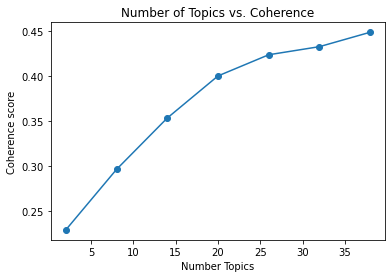

In [608]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.scatter(x, coherence_values)
plt.title('Number of Topics vs. Coherence')
plt.xlabel("Number Topics")
plt.ylabel("Coherence score")
plt.show()

In [ ]:
#We can see that the maximum value for coherence occured at around 22 topics. We can try multiple values that are high to see which makes the most sense, such as 9,14,20,21,22. We will go with 22 for now:

In [228]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2288
Num Topics = 8  has Coherence Value of 0.296
Num Topics = 14  has Coherence Value of 0.3531
Num Topics = 20  has Coherence Value of 0.3999
Num Topics = 26  has Coherence Value of 0.4235
Num Topics = 32  has Coherence Value of 0.4325
Num Topics = 38  has Coherence Value of 0.4485


In [605]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

In [603]:
# To show initial topics
#model_topics = optimal_model.show_topics(formatted=False)
optimal_model.show_topics(22, num_words=10, formatted=False)

[(0,
  [('quarantine', 0.17691029900332225),
   ('day', 0.14700996677740863),
   ('watch', 0.03612956810631229),
   ('back', 0.030730897009966777),
   ('long', 0.02782392026578073),
   ('feel', 0.026993355481727575),
   ('learn', 0.025332225913621262),
   ('friend', 0.022425249169435217),
   ('move', 0.020764119601328904),
   ('eat', 0.015780730897009966)]),
 (1,
  [('follow', 0.04081632653061224),
   ('nation', 0.02344767694311767),
   ('money', 0.022579244463742945),
   ('global', 0.020842379504993486),
   ('safe', 0.01997394702561876),
   ('shit', 0.018671298306556665),
   ('bring', 0.0182370820668693),
   ('visit', 0.016500217108119844),
   ('base', 0.01606600086843248),
   ('increase', 0.014329135909683021)]),
 (2,
  [('amp', 0.0469361147327249),
   ('put', 0.04606692742285962),
   ('place', 0.03737505432420687),
   ('plan', 0.03346371142981312),
   ('measure', 0.03215993046501521),
   ('play', 0.030421555845284658),
   ('action', 0.01694915254237288),
   ('meeting', 0.01607996523

In [234]:
# finding the dominat topic in each sentence 
#finding the topic number that has the highest percentage cvontintonsd in the at document

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(20)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0             0            18.0              0.0859   
1             1             2.0              0.0639   
2             2             0.0              0.0500   
3             3             0.0              0.0625   
4             4            12.0              0.0680   
5             5             0.0              0.0500   
6             6             0.0              0.0500   
7             7             0.0              0.0500   
8             8             0.0              0.0500   
9             9             0.0              0.0500   
10           10            18.0              0.0905   
11           11             5.0              0.0804   
12           12             0.0              0.0500   
13           13             3.0              0.0815   
14           14             1.0              0.0902   
15           15             7.0              0.0809   
16           16             1.0              0.0669   
17           17             9.0              0.0780   
18           18             2.0              0.0657   
19           19             1.0              0.0660   

                                             Keywords  \
0   case, confirm, today, close, travel, record, m...   
1   amp, put, place, plan, measure, play, action, ...   
2   quarantine, day, watch, back, long, feel, lear...   
3   quarantine, day, watch, back, long, feel, lear...   
4   give, windhoek, fight, man, change, hear, hard...   
5   quarantine, day, watch, back, long, feel, lear...   
6   quarantine, day, watch, back, long, feel, lear...   
7   quarantine, day, watch, back, long, feel, lear...   
8   quarantine, day, watch, back, long, feel, lear...   
9   quarantine, day, watch, back, long, feel, lear...   
10  case, confirm, today, close, travel, record, m...   
11  life, medical, hospital, big, part, patient, w...   
12  quarantine, day, watch, back, long, feel, lear...   
13  good, find, job, business, workingfromhome, sh...   
14  follow, nation, money, global, safe, shit, bri...   
15  work, home, stay, office, pay, staff, employee...   
16  follow, nation, money, global, safe, shit, bri...   
17  people, die, live, talk, walk, run, understand...   
18  amp, put, place, plan, measure, play, action, ...   
19  follow, nation, money, global, safe, shit, bri...   

                                                 Text  
0   [actually, admire, judgement, travel, non, ess...  
1                              [place, trip, weekend]  
2                                                  []  
3      [service, put, countrys, isolation, day, trip]  
4   [place, selfisolation, day, test, afterwards, ...  
5                                                  []  
6                                                  []  
7                                                  []  
8                                                  []  
9                                                  []  
10  [first, visit, case, undiscovered, local, tran...  
11       [zambian, papa, arrest, trick, people, cure]  
12                                               [so]  
13  [gather, attend, follow, trip, last, week, ed,...  
14  [break, botswana, officialmasisi, precautionar...  
15  [let, take, seriously, stay, home, stay_safe, ...  
16   [bwgovernment, look, confirmation, follow, trip]  
17                       [people, go, many, caseload]  
18  [place, day, travel, follow, still, believe, d...  
19                              [place, follow, trip]

In [238]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.1675   
1        1.0              0.1715   
2        2.0              0.2021   
3        3.0              0.1903   
4        4.0              0.1969   
5        5.0              0.2005   
6        6.0              0.2049   
7        7.0              0.1507   
8        8.0              0.1769   
9        9.0              0.1915   

                                            Keywords  \
0  quarantine, day, watch, back, long, feel, lear...   
1  follow, nation, money, global, safe, shit, bri...   
2  amp, put, place, plan, measure, play, action, ...   
3  good, find, job, business, workingfromhome, sh...   
4  health, test, government, care, support, socia...   
5  life, medical, hospital, big, part, patient, w...   
6  country, bad, leave, flight, suspend, issue, c...   
7  work, home, stay, office, pay, staff, employee...   
8  work, home, start, week, tomorrow, kid, parent...   
9  people, die, live, talk, walk, run, understand...   

                                                Text  
0  [cat, dog, must, great, life, go, eat, sleep, ...  
1  [rollout, cent, complete, majority, australian...  
2  [imminent, immediately, announce, emipayment, ...  
3  [sign, initiate, state, wide, quarantine, deli...  
4  [right, funding, people, essential, nonhealth,...  
5  [super, strong, medical, system, world, reserc...  
6  [suspend, regional, flight, may, cancel, inter...  
7  [work, home, work, home, weekend, spend, time,...  
8  [planning, work, schedule, tomorrow, weaving, ...  
9  [many, idiot, gather, seaside, town, national,...

In [243]:
#Topic distribution across document 


# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

Dominant_Topic                                     Topic_Keywords  \
0.0               18.0  case, confirm, today, close, travel, record, m...   
1.0                2.0  amp, put, place, plan, measure, play, action, ...   
2.0                0.0  quarantine, day, watch, back, long, feel, lear...   
3.0                0.0  quarantine, day, watch, back, long, feel, lear...   
4.0               12.0  give, windhoek, fight, man, change, hear, hard...   
...                ...                                                ...   
7297.0             7.0  work, home, stay, office, pay, staff, employee...   
7298.0             7.0  work, home, stay, office, pay, staff, employee...   
7299.0             8.0  work, home, start, week, tomorrow, kid, parent...   
7300.0            16.0  windhoek, call, service, high, city, social, d...   
7301.0            11.0  time, thing, week, year, wait, end, hope, love...   

        Num_Documents  Perc_Documents  
0.0            1210.0          0.1657  
1.0             333.0          0.0456  
2.0             267.0          0.0366  
3.0             309.0          0.0423  
4.0             336.0          0.0460  
...               ...             ...  
7297.0            NaN             NaN  
7298.0            NaN             NaN  
7299.0            NaN             NaN  
7300.0            NaN             NaN  
7301.0            NaN             NaN  

[7302 rows x 4 columns]

In [ ]:
### word embeddings

In [178]:

alltext2 = [x.split(" ")  for x in alltext]
    

In [179]:
len(alltext2)

7302

In [244]:
model1 = gensim.models.Word2Vec(alltext2, min_count = 10,  
                              size = 100, window = 5) 

In [245]:
type(model1)

gensim.models.word2vec.Word2Vec

In [246]:
print (model1)

Word2Vec(vocab=1715, size=100, alpha=0.025)


In [250]:
print("Cosine similarity between 'alice' " + 
               "and 'wonderland' - CBOW : ", 
    model1.similarity('covid', 'coronavirus')) 

Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.83140665


D:\Programs\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


D:\Programs\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


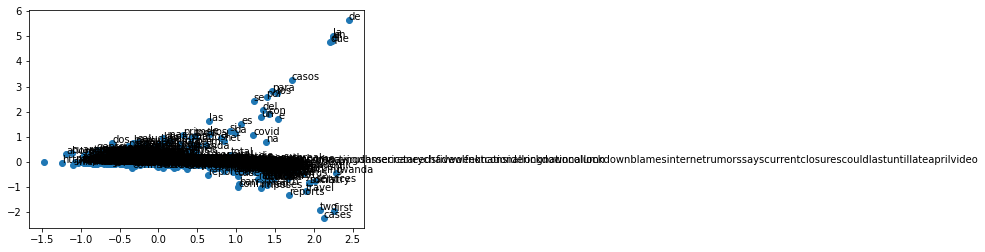

In [252]:
X = model1[model1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    
pyplot.show()

In [ ]:
#bag of words

In [254]:
alltext3= [x.split(" ")  for x in alltext]

In [255]:
len(alltext3)

7302

In [262]:
print("sample",alltext)

sample  


In [ ]:
len(df['twts'])

In [ ]:
import tfidfVectorizer from 

In [ ]:
tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocessing)
tfidf = tfidf_vectorizer.fit_transform(all_text)

In [393]:
vectorizer = TfidfVectorizer()
data_vectorised = vectorizer.fit_transform(alltext)

#if u want to look at itdata_vectorised
tdm = pd.DataFrame(data_vectorised.toarray(), columns = vectorizer.get_feature_names())
print (tdm)

      aaah  aaas  aaaye  aada  aae  aajtak  aakiintu  aakwanyamas  aamir  aan  \
0      0.0   0.0    0.0   0.0  0.0     0.0       0.0          0.0    0.0  0.0   
1      0.0   0.0    0.0   0.0  0.0     0.0       0.0          0.0    0.0  0.0   
2      0.0   0.0    0.0   0.0  0.0     0.0       0.0          0.0    0.0  0.0   
3      0.0   0.0    0.0   0.0  0.0     0.0       0.0          0.0    0.0  0.0   
4      0.0   0.0    0.0   0.0  0.0     0.0       0.0          0.0    0.0  0.0   
...    ...   ...    ...   ...  ...     ...       ...          ...    ...  ...   
7297   0.0   0.0    0.0   0.0  0.0     0.0       0.0          0.0    0.0  0.0   
7298   0.0   0.0    0.0   0.0  0.0     0.0       0.0          0.0    0.0  0.0   
7299   0.0   0.0    0.0   0.0  0.0     0.0       0.0          0.0    0.0  0.0   
7300   0.0   0.0    0.0   0.0  0.0     0.0       0.0          0.0    0.0  0.0   
7301   0.0   0.0    0.0   0.0  0.0     0.0       0.0          0.0    0.0  0.0   

      ...  única  único  üb

In [298]:
(alltext[1:5])

['president botswana placed isolation trip namibia weekend mr mnangagwa zimbabwe coronavirus',
 'botswana president coronavirus selfisolation namibia trip httpswwwafricanewscombotswanapresidentinselfisolationafternamibiatrip cc magufulijp',
 'update botswana director health services puts countrys president mokgweetsi masisi isolation days trip namibia measure contain spread coronavirus covid',
 'botswana president mokgweetsi masisi placed selfisolation days tested coronavirus afterwards following trip hage geingob inauguration namibia yesterday']

In [522]:
alltext = list(df['twts'])

In [427]:
from sklearn.cluster import KMeans

#### Clustering for EDA 

In [428]:
#kmeans = KMeans(n_clusters=2).fit(tfidf)

In [500]:
km = KMeans(n_clusters= 10)

clusters = km.fit(data_vectorised)
#Show counts per cluster number
print("Counts per Cluster", np.unique(clusters.labels_, return_counts=True))


Counts per Cluster (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([  39,  545,  836,  245,  857,  898,   81, 2813,  681,  307],
      dtype=int64))


In [501]:
y_Kmeans = km.predict(data_vectorised)

In [502]:
print("Number of documents clustered", np.unique(clusters.labels_, return_counts=True)[1].sum())

#Show number of iterations of K-means

Number of documents clustered 7302


In [503]:
print("number of iterations: {0}".format(clusters.n_iter_))
#add the cluster number to each input iati record

number of iterations: 35


In [504]:
df['clusterresult']=clusters.labels_
print (df)

                                                   twts  clusterresult
0     someone actually admires masisihis judgement t...              7
1     president botswana placed isolation trip namib...              8
2     botswana president coronavirus selfisolation n...              8
3     update botswana director health services puts ...              8
4     botswana president mokgweetsi masisi placed se...              8
...                                                 ...            ...
7297  twins totally pulling mpinoe workingfromhome v...              7
7298                       going work working home alas              5
7299  newstomorrow day many parents working home kid...              5
7300  cleaning lady called told us working home send...              5
7301  working home still saying ok guys im kicked ro...              5

[7302 rows x 2 columns]


In [505]:
clusters.cluster_centers_.shape

(10, 22886)

In [506]:
#defining the random state value to use in the PCA calculation
## for reproducibility
random_state = 0 

In [507]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(data_vectorised.toarray())

reduced_cluster_centers = pca.transform(km.cluster_centers_)

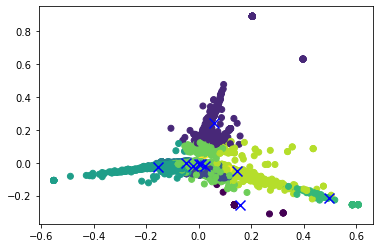

In [508]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=km.predict(data_vectorised) ,cmap='viridis')
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=100, c='b')

In [447]:
y_Kmeans

array([0, 0, 0, ..., 2, 2, 2])

AttributeError: 'PathCollection' object has no property 'cmpa'

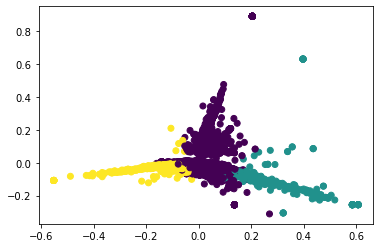

In [449]:
# plot the predicted valaues 
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=km.predict(data_vectorised))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=100, c='b',cmpa = 'viridis') 

In [509]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  

In [512]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sid=SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tuli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<Figure size 720x360 with 0 Axes>

In [ ]:
df['test'] = 

In [525]:
tokens['sentiment_compound_porality']=tokens.text.apply(lambda x:sid.polarity_scores(x)['compound'])


AttributeError: 'list' object has no attribute 'text'

In [511]:
df['sentiment_compound_porality']=df.text.apply(lambda x:sid.polarity_scores(x)['compound'])
df['sentiment_neutral']=df.text.apply(lambda x:sid.polarity_scores(x)['neu'])
df['sentiment_negative']=df.text.apply(lambda x:sid.polarity_scores(x)['neg'])
df['sentiment_positive']=df.text.apply(lambda x:sid.polarity_scores(x)['pos'])
# df['sentiment_type']=''

tokens.loc[df.sentiment_compound_porality>0,'sentiment_type']='POSITIVE'
df.loc[df.sentiment_compound_porality==0,'sentiment_type']='NEUTRAL'
df.loc[df.sentiment_compound_porality<0,'sentiment_type']='NEGATIVE'
df.head()

AttributeError: 'DataFrame' object has no attribute 'text'

In [422]:
#df2 = pd.DataFrame(eval('data_vectorised'),data=df, dtype=np.int8)

In [ ]:
# creating a sentimetal analysis

Dominant_Topic                                     Topic_Keywords  \
0.0               18.0  case, confirm, today, close, travel, record, m...   
1.0                2.0  amp, put, place, plan, measure, play, action, ...   
2.0                0.0  quarantine, day, watch, back, long, feel, lear...   
3.0                0.0  quarantine, day, watch, back, long, feel, lear...   
4.0               12.0  give, windhoek, fight, man, change, hear, hard...   
...                ...                                                ...   
7297.0             7.0  work, home, stay, office, pay, staff, employee...   
7298.0             7.0  work, home, stay, office, pay, staff, employee...   
7299.0             8.0  work, home, start, week, tomorrow, kid, parent...   
7300.0            16.0  windhoek, call, service, high, city, social, d...   
7301.0            11.0  time, thing, week, year, wait, end, hope, love...   

        Num_Documents  Perc_Documents  
0.0            1210.0          0.1657  
1.0             333.0          0.0456  
2.0             267.0          0.0366  
3.0             309.0          0.0423  
4.0             336.0          0.0460  
...               ...             ...  
7297.0            NaN             NaN  
7298.0            NaN             NaN  
7299.0            NaN             NaN  
7300.0            NaN             NaN  
7301.0            NaN             NaN  

[7302 rows x 4 columns]